<a href="https://colab.research.google.com/github/ymiu/my_first_Repository/blob/main/%E6%97%A5%E6%9C%AC%E8%AA%9EStable_Diffusion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install git+https://github.com/rinnakk/japanese-stable-diffusion


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rinnakk/japanese-stable-diffusion to /tmp/pip-req-build-pg8mp0fd
  Running command git clone -q https://github.com/rinnakk/japanese-stable-diffusion /tmp/pip-req-build-pg8mp0fd
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-install-ytcbt_64/diffusers_8eb5d2e08938407595ae2a658e52d9ae
  Running command git clone -q https://github.com/huggingface/diffusers /tmp/pip-install-ytcbt_64/diffusers_8eb5d2e08938407595ae2a658e52d9ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 30.0 MB/s 
     |████████████████████████████████| 1.6 MB 54.9 MB/s 
     |████████████████████████████████| 4.9 MB 49.2 MB/s 
     |████████████████████████████████| 5.3 MB 57.5 MB/s 
     |████████████████████████████████| 120 kB 67.1 MB/s 
     |█████████

In [4]:
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your termin

  0%|          | 0/50 [00:00<?, ?it/s]

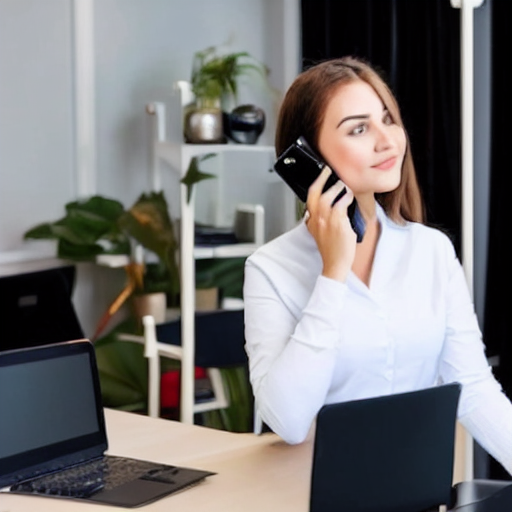

In [19]:
import torch
from torch import autocast
from diffusers import LMSDiscreteScheduler
from japanese_stable_diffusion import JapaneseStableDiffusionPipeline

model_id = "rinna/japanese-stable-diffusion"
device = "cuda"
# Use the K-LMS scheduler here instead
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
pipe = JapaneseStableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, use_auth_token=True)
pipe = pipe.to(device)

prompt = "会議室に設置されているフォークリフトの横で電話対応をする若い女性、高画質、写真、制服、黒髪、フォークリフト"
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5)["sample"][0]  
    
image
